# Import Dependencies 

In [26]:
import pandas as pd 
import os 
import matplotlib as plt 
import numpy as np
import seaborn as sns

# Column Descriptions 

#### id = Spotify URI of the song
#### name = name of the song 
#### artist = Artist who wrote the song
#### danceability = Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
#### Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
#### key = The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.
#### loudness = The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.
#### mode = Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
#### speechiness = Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
#### acousticness = A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
#### instrumentalness = Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
#### liveness = Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
#### valence = A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
#### tempo = The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
#### duration_ms = The duration of the track in milliseconds.
#### time_signature = An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

In [6]:
file = 'top2018.csv'
top18 = pd.read_csv(file)
top18.head()


,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,6DCZcSspjsKoFjzjrWoCd,God's Plan,Drake,0.754,0.449,7.0,-9.211,1.0,0.1090,0.0332,0.000083,0.552,0.357,77.169,198973.0,4.0
1,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,0.740,0.613,8.0,-4.880,1.0,0.1450,0.2580,0.003720,0.123,0.473,75.023,166606.0,4.0
2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5.0,-6.090,0.0,0.0898,0.1170,0.000066,0.131,0.140,159.847,218147.0,4.0
3,3swc6WTsr7rl9DqQKQA55,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8.0,-8.011,1.0,0.1170,0.5800,0.000000,0.112,0.439,140.124,221440.0,4.0
4,2G7V7zsVDxg1yRsu7Ew9R,In My Feelings,Drake,0.835,0.626,1.0,-5.833,1.0,0.1250,0.0589,0.000060,0.396,0.350,91.030,217925.0,4.0


# Finding Which Artist has the most songs in the top 100 of 2018

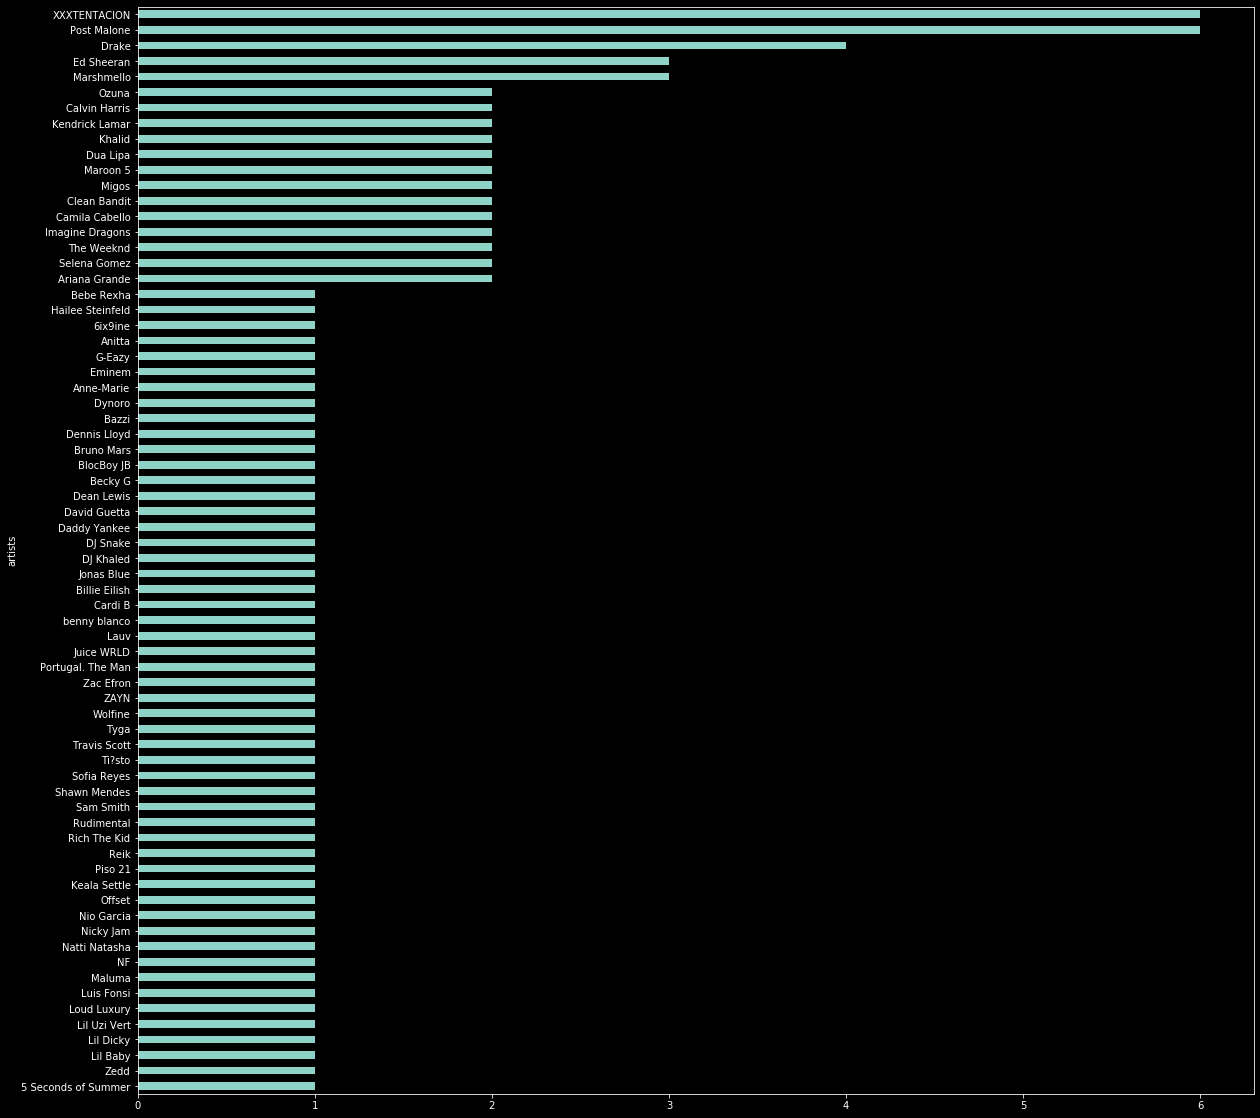

In [17]:
top18_by_artist = top18.groupby('artists')['name']
top18_by_artist.count().sort_values(ascending = True).plot.barh(figsize = (20,20))


## Findings 

#### XXX and Post Malone have the most songs in the top 100 of 2018, tied at 6 songs each. They are followed by drake who has 4 and every other artist who has either 3 or less songs. Its interesting to see that the top 3 artist are all considered rappers. 

# Danceability among the top 100 

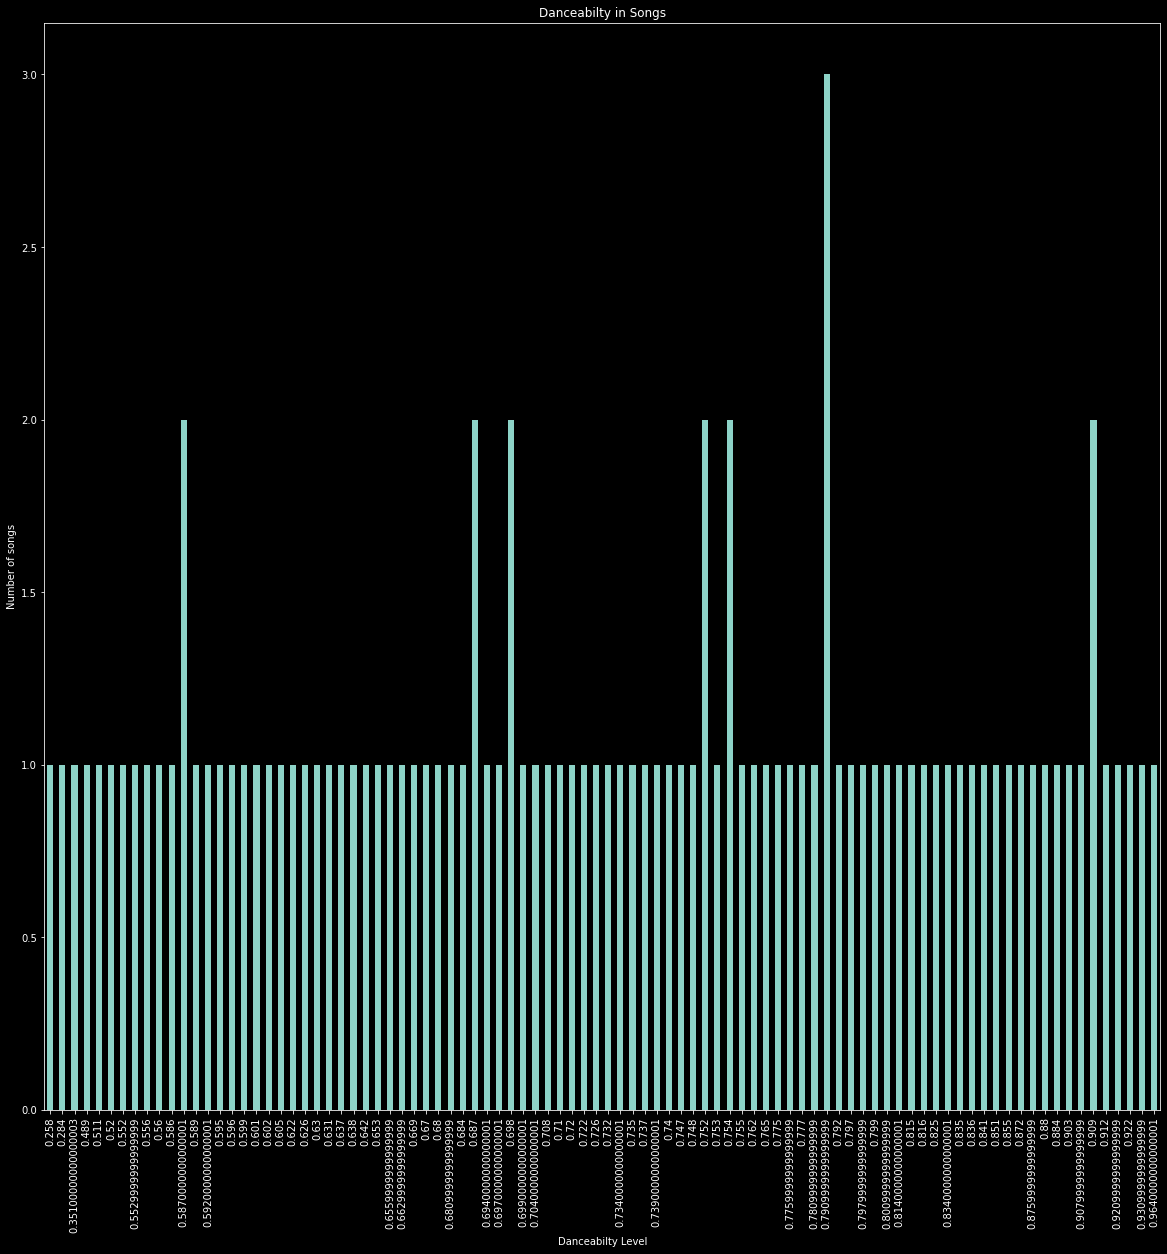

In [24]:
top18_by_dance = top18.groupby('danceability')['danceability']
top18_by_dance.count().plot.bar(figsize=(20,20)).set(xlabel="Danceabilty Level", ylabel="Number of songs", title ="Danceabilty in Songs")
above_half = []
under_half = []
for row in top18_by_dance:
    if row[0] > .5:
        above_half.append(row[0])
    else:
        under_half.append(row[0])

## Findings 

#### My assumption hear is that songs that are under .5 in the danceability catergory are not danceabile and if we go by that assumption of the top 100 songs 88% of the songs are danceabile. Only 12 songs are consindered non danceabile too. I find that interesting because that may have an influence on artist when making music if they want the song to be a hit throughout the whole year. 

# Energy among the top 100

[Text(0, 0.5, 'Number of songs'),
 Text(0.5, 0, 'Energy Level'),
 Text(0.5, 1.0, 'Energy in Songs')]

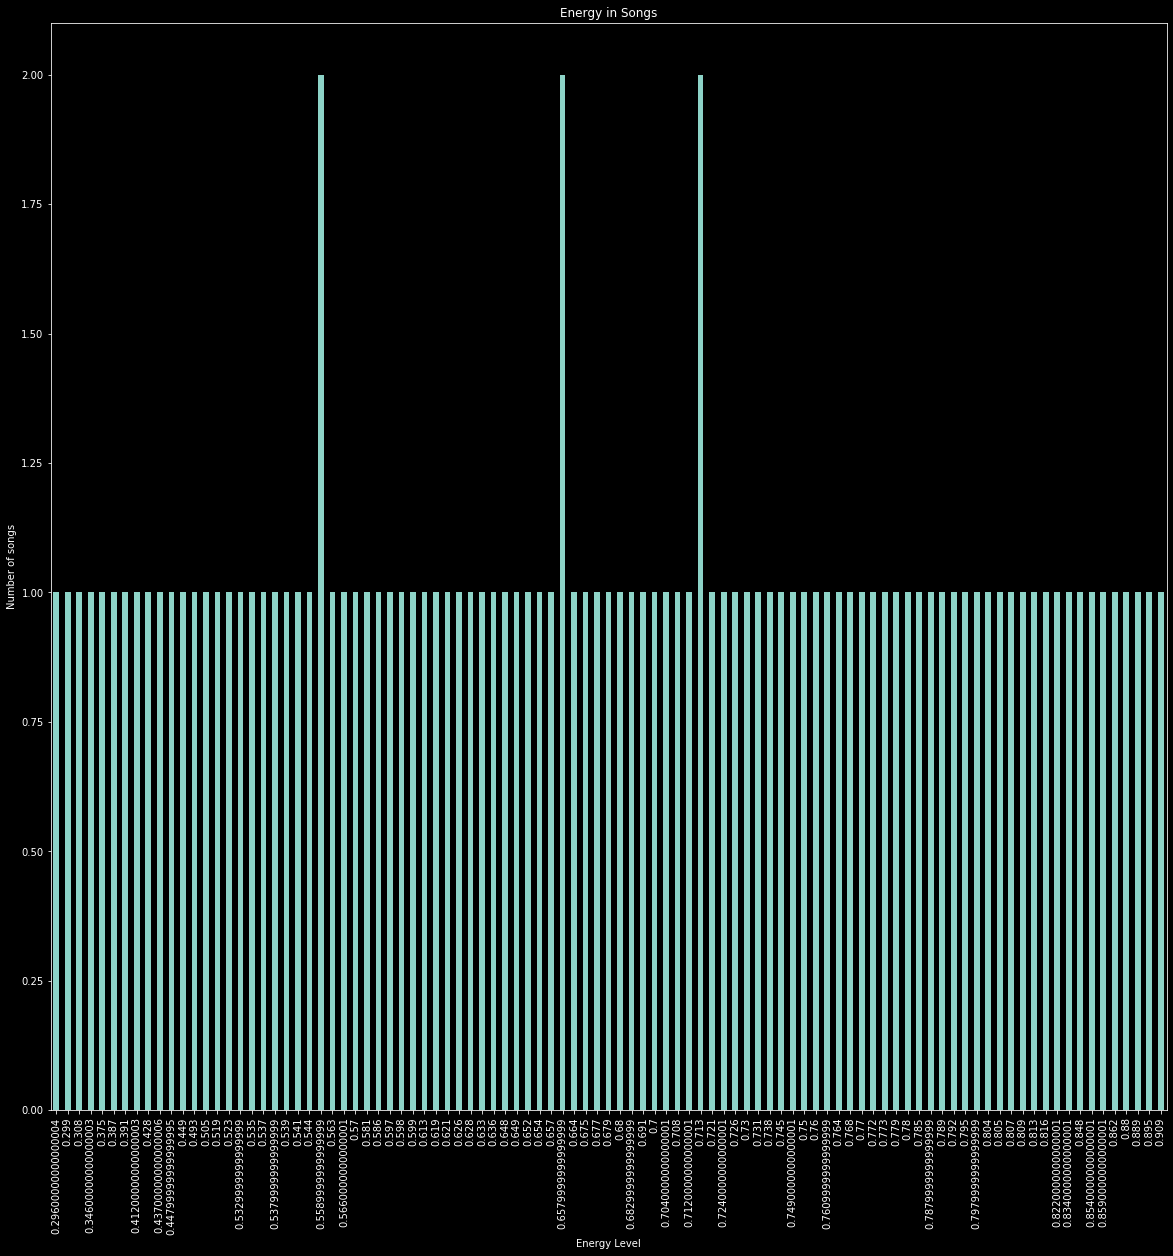

In [23]:
top18_by_energy = top18.groupby('energy')['energy']
top18_by_energy.count().plot.bar(figsize=(20,20)).set(xlabel="Energy Level", ylabel="Number of songs", title ="Energy in Songs")


# Heatmap 

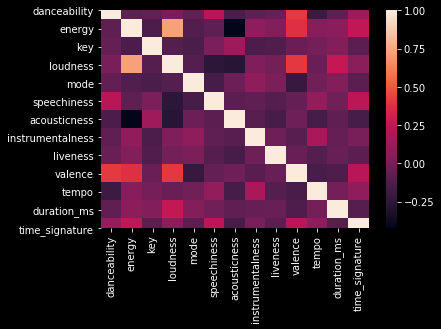

In [28]:
sns.heatmap(top18.corr())

# Correlation 

### This heat map will show the correlations using the corr function from pandas and then using that we make a heat map to show the correlations between certain columns.